<a href="https://colab.research.google.com/github/akipi-ro/daily_study/blob/master/dip%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# coding: utf-8
import numpy as np
import pandas as pd
import sklearn

import re

import seaborn as sns
%matplotlib inline
# plt.style.use("ggplot")

pd.set_option("max_columns",200)
pd.set_option("max_rows",200)


#,header=None,delim_whitespace=True,decimal=","
x=pd.read_csv("train_x.csv",encoding="utf-8")#説明
y=pd.read_csv("train_y.csv")#目的

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#結合

*   結合する前に集約していたからトレインテストスピリットで行数合わなくなるなどの面倒くさいことになった
*   結合したらお仕事Noで集約



In [30]:
ketugo=x.merge(y,on="お仕事No.",how="left")
ketugo

,職場の様子,（紹介予定）入社後の雇用形態,勤務地 最寄駅3（駅名）,勤務地固定,休日休暇(月曜日),応募先 名称,（派遣先）配属先部署 男女比 男,勤務地 最寄駅3（沿線名）,（派遣先）勤務先写真コメント,勤務地 最寄駅3（分）,無期雇用派遣,勤務地 最寄駅2（駅名）,未使用.14,（派遣以外）応募後の流れ,（派遣先）概要 従業員数,電話応対なし,大手企業,（紹介予定）雇用形態備考,週払い,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,固定残業制 残業代 下限,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,未使用.11,短時間勤務OK(1日4h以内),駅から徒歩5分以内,フリー項目 内容,先輩からのメッセージ,対象者設定 年齢下限,未使用.10,学校・公的機関（官公庁）,土日祝のみ勤務,掲載期間 開始日,動画コメント,Wordのスキルを活かす,未使用.8,経験必須,固定残業制 残業代に充当する労働時間数 下限,給与/交通費 給与支払区分,ブロックコード2,勤務地 最寄駅1（分）,未使用.4,CAD関連のスキルを活かす,未使用.7,お仕事No.,メモ,派遣スタッフ活躍中,ブロックコード3,固定残業制,WEB面接OK,大量募集,公開区分,17時以降出社OK,寮・社宅あり,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,ネットワーク関連のスキルを活かす,Wワーク・副業可能,勤務地 最寄駅2（沿線名）,休日休暇(火曜日),固定残業制 残業代に充当する労働時間数 上限,プログラム関連のスキルを活かす,未使用.15,平日休みあり,（派遣先）概要 勤務先名（漢字）,勤務地 最寄駅2（駅からの交通手段）,休日休暇 備考,30代活躍中,フラグオプション選択,未使用.12,エルダー（50〜）活躍中,（派遣）応募後の流れ,期間・時間 勤務時間,期間・時間 勤務期間,派遣形態,人材紹介,週2・3日OK,主婦(ママ)・主夫歓迎,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,勤務地 備考,英語力不要,拠点番号,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,ブロックコード1,フリー項目 タイトル,社員食堂あり,（紹介予定）入社時期,...,外資系企業,（派遣先）勤務先写真ファイル名,応募先 最寄駅（沿線名）,服装自由,仕事写真（下） 写真1 ファイル名,PowerPointのスキルを活かす,未使用.16,仕事写真（下） 写真3 ファイル名,オープニングスタッフ,応募先 所在地 ブロックコード,（派遣先）配属先部署,（派遣先）配属先部署 男女比 女,応募先 所在地 都道府県,動画タイトル,仕事内容,（派遣先）概要 事業内容,応募先 最寄駅（駅名）,残業月10時間未満,休日休暇(土曜日),（紹介予定）年収・給与例,外国人活躍中・留学生歓迎,履歴書不要,未使用.17,休日休暇(木曜日),未使用.9,研修制度あり,日払い,未使用,勤務地 最寄駅1（沿線名）,未使用.18,未使用.22,未使用.5,（派遣先）配属先部署 平均年齢,英語力を活かす,勤務地 周辺情報,仕事写真（下） 写真2 ファイル名,バイク・自転車通勤OK,仕事写真（下） 写真2 コメント,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,未使用.3,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),未使用.2,WEB関連のスキルを活かす,仕事の仕方,未使用.6,給与 経験者給与下限,勤務地 最寄駅1（駅からの交通手段）,応募資格,学生歓迎,紹介予定派遣,固定残業制 残業代 上限,未使用.19,（紹介予定）休日休暇,給与 経験者給与上限,シフト勤務,経験者優遇,週4日勤務,未経験OK,派遣会社のうれしい特典,土日祝休み,給与/交通費 交通費,掲載期間 終了日,未使用.21,待遇・福利厚生,シニア（60〜）歓迎,ベンチャー企業,少人数の職場,仕事写真（下） 写真3 コメント,新卒・第二新卒歓迎,休日休暇(金曜日),お仕事のポイント（仕事PR）,産休育休取得事例あり,扶養控除内,動画ファイル名,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,応募先 備考,オフィスが禁煙・分煙,応募先 所在地 市区町村,仕事写真（下） 写真1 コメント,勤務地 市区町村コード,（派遣先）職場の雰囲気,未使用.13,（紹介予定）待遇・福利厚生,勤務地 最寄駅1（駅名）,勤務地 最寄駅2（分）,応募拠点,給与/交通費 備考,残業なし,これまでの採用者例,期間･時間 備考,（派遣先）概要 勤務先名（フリガナ）,応募数 合計
0,3,NaN,NaN,1,0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,12.0,NaN,0,22010,1,1,1,NaN,0,1,NaN,NaN,0,NaN,1,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,3.0,NaN,0,NaN,2203566799,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,※土・日・祝がお休みです。※企業カレンダーあります。,1,1,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:30〜16:30 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,0,NaN,0,NaN,0,1,0,0,0,東京都足立区,1,206東京,1,0,0,NaN,NaN,1,NaN,...,0,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,事務処理を行う部署,4.0,NaN,こだわりの条件でワガママに探せる＊,１月スタート！実働短め☆残業ほとんどなし×基本土日祝お休み！朝は少しゆっくりの９：３０出勤で...,NaN,NaN,0,1,NaN,NaN,1,NaN,0,NaN,1,NaN,NaN,東京メトロ千代田線,NaN,NaN,NaN,45.0,0,NaN,NaN,NaN,NaN,0,30000,13,NaN,0,0,0,NaN,0,NaN,NaN,2,NaN,NaN,1.0,◆未経験者歓迎！<BR>【使用するＯＡスキル】Ｅｘｃｅｌ（ＶＬＯＯＫ関数）<BR><BR>▼...,NaN,0,NaN,NaN,NaN,NaN,0,1,0,1,"●当社は全国17,000件のお仕事を取り扱っており、毎日100名以上の方が就業を決めています...",1,3,2020/11/27,NaN,NaN,NaN,NaN,NaN,NaN,1,0,◆駅からスグ！飲食店・コンビニが近く便利！職場環境ＧＯＯＤ◎！当社含む派遣スタッフ多数活躍中...,1,0,022_190725.mp4,1550,1,1,NaN,1,NaN,NaN,121,当社スタッフ活躍中です！<BR>,NaN,NaN,北千住,NaN,NaN,【月収例】19万5300円＋残業代（21日勤務の場合）,1,NaN,◆開始日はご相談可能です！詳しくはお問い合わせください！,NaN,1.945910
1,3,1.0,NaN,1,0,NaN,2.0,NaN,NaN,NaN,NaN,淡路町,NaN,NaN,NaN,NaN,1,正社員,NaN,0,0,33.0,NaN,0,20020,1,1,1,NaN,0,1,NaN,NaN,0,NaN,0,0,2019/11/27,「未経験OK」「土日祝休み」「残業ほぼナシ」など、希望の条件にこだわって探せる♪*お仕事件数...,1,NaN,NaN,NaN,3,NaN,1.0,NaN,0,NaN,2203546900,NaN,1,NaN,0,NaN,0,2,NaN,NaN,1,0,1,1,NaN,NaN,東京メトロ丸ノ内線,0,NaN,NaN,NaN,0,NaN,1.0,※土・日・祝がお休みです。,1,3,NaN,NaN,＊最後までご覧いただき、ありがとうございます＊<BR><BR>「わたしでもチャレンジできるか...,9:00〜17:00 <BR>※残業はほとんどありません。<BR>※休憩は６０分です。,5,1,NaN,0,NaN,0,1,0,1,0,東京都千代田区,1,206東京,1,0,0,NaN,NaN,1,◆3ヶ月後,...,0,1018-2.jpg,NaN,1,NaN,0,NaN,NaN,NaN,NaN,経理部,8.0,NaN,こだわりの条件でワガママに探せる＊,＜大手損保会社＞産休・育休取得実績ありの企業さんです♪ランチに嬉しい社員食堂完備の職場ですよ...,※ご紹介先により異なります。詳細はお問い合わせ下さい。,NaN,0,1,★正社員登用後：年収３５０万円〜（賞与含２回／年１．８ヶ月分）★※実際の年収等は別途ご確認く...,NaN,1,NaN,0,NaN,1,NaN,NaN,東京メトロ千代田線,NaN,NaN,NaN,45.0,0,NaN,NaN,NaN,NaN,0,28000,13,NaN,0,0,0,2000.0,0,NaN,NaN,1,NaN,NaN,1.0,【専門・高専卒以上】◆事務経験・簿記３級程度の知識がある

#欠損値の処理

In [31]:
# x=x.dropna(how='all',axis=1)#全て欠損値の列を削除

# x.isnull().sum()[x.isnull().sum()>=15853].sort_values()
# x.isnull().sum()[x.isnull().sum()<=0].sort_values()#無欠損のデータを確認



# #型の確認
# na_columns = x.isnull().sum()[x.isnull().sum()>=15853].sort_values().index.tolist()#ゴミの型の確認
# na_columns = x.isnull().sum()[x.isnull().sum()<=0].sort_values().index.tolist()#無欠損型の確認
# x[na_columns].dtypes

# x.describe()#代表値の確認

# #欠損値の穴埋め

# # x.head()

#Xの重複について

1.   重複をNoごとにまとめた



In [32]:
#print(x[x.duplicated()])#重複の確認　重なっているものを出す
# x.duplicated()　　　　　　　　　　　　#全てのデータを出し、true,Flaseで出す
#print(x.duplicated().value_counts())#重複した数を示す


# print(x.drop_duplicates())#重複けした後表示用
# x=x.drop_duplicates()#.reset_index()#重複の決定　インデックスは振ってない #ここ！
# x.describe()


In [33]:
# x.drop(["掲載期間　開始日","掲載期間　終了日","動画コメント","応募資格"
# ,"派遣会社のうれしい特典","お仕事のポイント（仕事PR）","（派遣先）職場の雰囲気","期間･時間　備考"
# ,"勤務地　最寄駅2（駅名）","勤務地　最寄駅2（沿線名）","（紹介予定）雇用形態備考","（紹介予定）休日休暇","勤務地　最寄駅1（駅名）","給与/交通費　備考"
# ,"休日休暇　備考","（派遣）応募後の流れ","期間・時間　勤務時間","（派遣先）概要　事業内容","（紹介予定）年収・給与例","勤務地　最寄駅1（沿線名）"
# ,"動画タイトル","仕事内容","（派遣先）配属先部署","動画ファイル名","（派遣先）勤務先写真ファイル名","（紹介予定）待遇・福利厚生"
# ,"勤務地　備考","拠点番号","お仕事名","（紹介予定）入社時期","期間・時間　勤務開始日"],axis=1,inplace=True)

ketugo=ketugo.drop(["掲載期間　開始日","掲載期間　終了日","動画コメント","応募資格"
,"派遣会社のうれしい特典","お仕事のポイント（仕事PR）","（派遣先）職場の雰囲気","期間･時間　備考"
,"勤務地　最寄駅2（駅名）","勤務地　最寄駅2（沿線名）","（紹介予定）雇用形態備考","（紹介予定）休日休暇","勤務地　最寄駅1（駅名）","給与/交通費　備考"
,"休日休暇　備考","（派遣）応募後の流れ","期間・時間　勤務時間","（派遣先）概要　事業内容","（紹介予定）年収・給与例","勤務地　最寄駅1（沿線名）"
,"動画タイトル","仕事内容","（派遣先）配属先部署","動画ファイル名","（派遣先）勤務先写真ファイル名","（紹介予定）待遇・福利厚生"
,"勤務地　備考","拠点番号","お仕事名","（紹介予定）入社時期","期間・時間　勤務開始日"
,"（派遣先）概要　勤務先名（漢字）","学校・公的機関（官公庁）"],axis=1)

#,"(派遣）応募後の流れ","（派遣先）概要　事業内容","（紹介予定）年収・給与例","勤務地　最寄駅1（沿線名)"

#文字型で微妙な感じ
# x=x.drop(["勤務地　最寄駅2（駅名）","勤務地　最寄駅2（沿線名）"],axis=1) 

# x=x.drop(["（紹介予定）雇用形態備考 ","（紹,介予定）休日休暇"],axis=1)#文字型で関係ありそうなもの

# x=x.drop(["勤務地　最寄駅1（駅名）","給与/交通費　備考"],axis=1)#文字列で関係しそうなもの２

#数値で悪影響をもたらしそうなもの　　＃（派遣先）配属先部署　人数　＃職種コード #勤務地　市区町村コード

####################################
#欠損値処理
# x=x.dropna(how='all',axis=1)#全て欠損値の列を削除


# x=x.dtypes=float
#欠損うめ
# ketugo=ketugo.fillna(0)

# ketugo.head()
# ketugo



In [34]:

ketugo.isnull().sum()[ketugo.isnull().sum()>=15853].sort_values()
# x.isnull().sum()[x.isnull().sum()<=0].sort_values()#無欠損のデータを確認

勤務地　最寄駅2（駅からの交通手段）        19690
勤務地　最寄駅2（分）               19690
給与/交通費　給与上限               23032
（紹介予定）入社後の雇用形態            28793
仕事写真（下）　写真1　コメント          36141
勤務地　周辺情報                  36141
未使用.5                     36141
未使用.22                    36141
未使用.18                    36141
未使用                       36141
日払い                       36141
未使用.9                     36141
仕事写真（下）　写真2　ファイル名         36141
応募拠点                      36141
外国人活躍中・留学生歓迎              36141
応募先　最寄駅（駅名）               36141
応募先　所在地　都道府県              36141
応募先　所在地　ブロックコード           36141
オープニングスタッフ                36141
仕事写真（下）　写真3　ファイル名         36141
未使用.16                    36141
未使用.17                    36141
バイク・自転車通勤OK               36141
仕事写真（下）　写真2　コメント          36141
未使用.3                     36141
応募先　所在地　市区町村              36141
応募先　備考                    36141
仕事写真（下）　写真3　コメント          36141
少人数の職場                    36141
ベンチャー企業                   36141
シニア（60〜）歓迎                36141
待遇・福利厚生 

In [43]:
ketugo=ketugo.dropna(how='all',axis=1)#全て欠損値の列を削除

In [44]:
ketugo.isnull().sum()[ketugo.isnull().sum()>=15853].sort_values()

勤務地　最寄駅2（駅からの交通手段）    19690
勤務地　最寄駅2（分）           19690
給与/交通費　給与上限           23032
（紹介予定）入社後の雇用形態        28793
dtype: int64

In [55]:
ketugo["勤務地　最寄駅2（分）"].isnull().sum()
ketugo["勤務地　最寄駅1（分）"].isnull().sum()
ketugo["残業なし"].isnull().sum()

0

In [45]:
ketugo

,職場の様子,（紹介予定）入社後の雇用形態,勤務地固定,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,大手企業,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,土日祝のみ勤務,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,お仕事No.,派遣スタッフ活躍中,固定残業制,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,休日休暇(火曜日),平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,残業月10時間未満,休日休暇(土曜日),履歴書不要,休日休暇(木曜日),研修制度あり,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,休日休暇(金曜日),産休育休取得事例あり,扶養控除内,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,勤務地 最寄駅2（分）,残業なし,応募数 合計
0,3,NaN,1,0,6.0,0,0,0,12.0,0,22010,1,1,1,0,1,0,0,1,3,3.0,0,2203566799,1,0,0,2,1,0,1,1,0,0,NaN,1,1,5,0,0,0,1,0,0,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,4.0,0,1,1,0,1,45.0,0,0,30000,13,0,0,0,NaN,0,2,1.0,0,0,1,0,1,1,3,1,0,1,0,1550,1,1,1,121,NaN,1,1.945910
1,3,1.0,1,0,2.0,1,0,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,2203546900,1,0,0,2,1,0,1,1,0,0,1.0,1,3,5,1,0,0,1,0,1,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,0,1,45.0,0,0,28000,13,0,0,0,2000.0,0,1,1.0,1,0,1,0,0,1,3,1,0,1,0,1800,1,1,1,101,5.0,1,3.951244
2,3,1.0,1,0,2.0,1,0,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,2203546900,1,0,0,2,1,0,1,1,0,0,1.0,1,3,5,1,0,0,1,0,1,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,0,1,45.0,0,0,28000,13,0,0,0,2000.0,0,1,1.0,1,0,1,0,0,1,3,1,0,1,0,1800,1,1,1,101,5.0,1,3.295837
3,3,1.0,1,0,2.0,1,0,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,2203546900,1,0,0,2,1,0,1,1,0,0,1.0,1,3,5,1,0,0,1,0,1,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,0,1,45.0,0,0,28000,13,0,0,0,2000.0,0,1,1.0,1,0,1,0,0,1,3,1,0,1,0,1800,1,1,1,101,5.0,1,3.951244
4,3,1.0,1,0,2.0,1,0,0,33.0,0,20020,1,1,1,0,1,0,0,1,3,1.0,0,2203546900,1,0,0,2,1,0,1,1,0,0,1.0,1,3,5,1,0,0,1,0,1,0,1,1,0,0,1,1,99,0,1,0,1,0,1,0,8.0,0,1,1,0,1,45.0,0,0,28000,13,0,0,0,2000.0,0,1,1.0,1,0,1,0,0,1,3,1,0,1,0,1800,1,1,1,101,5.0,1,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36136,3,NaN,1,0,8.0,1,0,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,5903542254,0,0,0,2,1,0,1,1,0,1,NaN,1,0,5,0,0,0,1,0,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,0,1,39.0,0,0,22000,22,0,1,1,NaN,0,3,NaN,0,1,1,0,1,0,3,1,0,1,0,1280,1,1,1,132,NaN,1,0.000000
36137,3,NaN,1,0,8.0,1,0,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,5903542254,0,0,0,2,1,0,1,1,0,1,NaN,1,0,5,0,0,0,1,0,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,0,1,39.0,0,0,22000,22,0,1,1,NaN,0,3,NaN,0,1,1,0,1,0,3,1,0,1,0,1280,1,1,1,132,NaN,1,0.000000
36138,3,NaN,1,0,8.0,1,0,0,13.0,0,20020,0,1,1,0,0,0,0,1,3,NaN,0,5903542254,0,0,0,2,1,0,1,1,0,1,NaN,1,0,5,0,0,0,1,0,0,0,1,0,0,0,0,1,99,1,1,0,0,0,0,0,2.0,0,0,1,0,1,39.0,0,0,22000,22,0,1,1,NaN,0,3,NaN,0,1,1,0,1,0,3,1,0,1,0,1280,1,1,1,132,NaN,1,0.000000
36139,3,NaN,1,0,5.0,0,0,0,12.0,1,22030,0,1,1,0,1,0,0,1,3,4.0,0,5203533881,0,0,0,2,1,0,1,1,0,0,1.0,1,0,3,0,0,0,1,0,0,0,1,1,0,0,0,1,99,0,1,0,1,0,1,0,5.0,0,1,1,0,1,33.0,0,0,21000,22,0,0,0,1230.0,0,5,1.0,0,0,1,0,1,1,3,1,0,1,0,1100,1,1,1,101,6.0,0,0.693147


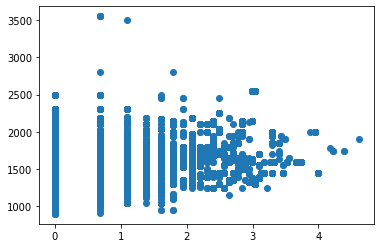

In [46]:
p=ketugo["応募数 合計"]
p2=ketugo["給与/交通費　給与上限"]

plt.scatter(p,p2)
plt.show()

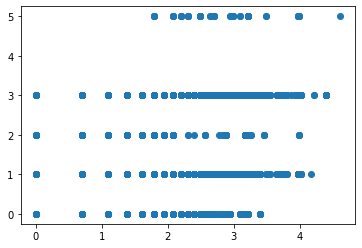

In [61]:

p3=ketugo["応募数 合計"]
p4=ketugo["フラグオプション選択"]

plt.scatter(p3,p4)
plt.show()

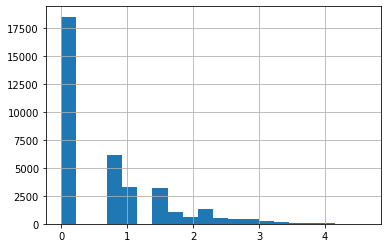

In [51]:
ketugo["応募数 合計"].hist(bins=20)

In [60]:
import seaborn as sons 
corr_mat = ketugo.corr(method='pearson')
ketugo.corr(method='pearson')



,職場の様子,（紹介予定）入社後の雇用形態,勤務地固定,休日休暇(月曜日),（派遣先）配属先部署 男女比 男,大手企業,週1日からOK,交通費別途支給,（派遣先）配属先部署 人数,残業月20時間以上,職種コード,1日7時間以下勤務OK,ミドル（40〜）活躍中,ルーティンワークがメイン,短時間勤務OK(1日4h以内),駅から徒歩5分以内,対象者設定 年齢下限,土日祝のみ勤務,Wordのスキルを活かす,給与/交通費 給与支払区分,勤務地 最寄駅1（分）,CAD関連のスキルを活かす,お仕事No.,派遣スタッフ活躍中,固定残業制,大量募集,公開区分,20代活躍中,Accessのスキルを活かす,検索対象エリア,就業形態区分,休日休暇(火曜日),平日休みあり,勤務地 最寄駅2（駅からの交通手段）,30代活躍中,フラグオプション選択,期間・時間 勤務期間,派遣形態,週2・3日OK,勤務先公開,Excelのスキルを活かす,16時前退社OK,正社員登用あり,残業月20時間未満,英語力不要,休日休暇(日曜日),雇用形態,Dip JobsリスティングS,社員食堂あり,資格取得支援制度あり,対象者設定 年齢上限,10時以降出社OK,社会保険制度あり,英語以外の語学力を活かす,休日休暇(祝日),外資系企業,服装自由,PowerPointのスキルを活かす,（派遣先）配属先部署 男女比 女,残業月10時間未満,休日休暇(土曜日),履歴書不要,休日休暇(木曜日),研修制度あり,（派遣先）配属先部署 平均年齢,英語力を活かす,DTP関連のスキルを活かす,会社概要 業界コード,勤務地 都道府県コード,PCスキル不要,車通勤OK,制服あり,給与/交通費 給与上限,休日休暇(水曜日),仕事の仕方,勤務地 最寄駅1（駅からの交通手段）,紹介予定派遣,シフト勤務,経験者優遇,週4日勤務,未経験OK,土日祝休み,給与/交通費 交通費,新卒・第二新卒歓迎,休日休暇(金曜日),産休育休取得事例あり,扶養控除内,給与/交通費 給与下限,対象者設定 性別,WEB登録OK,オフィスが禁煙・分煙,勤務地 市区町村コード,勤務地 最寄駅2（分）,残業なし,応募数 合計
職場の様子,1.000000,0.080002,NaN,-0.023297,-0.036149,0.057214,NaN,0.028218,0.051931,-0.001918,-0.040923,-0.015777,NaN,NaN,-0.035382,0.011280,NaN,0.001878,0.002101,NaN,-0.009227,NaN,-0.007874,0.014922,NaN,0.016054,NaN,NaN,-0.017474,NaN,NaN,-0.011792,0.029164,0.005695,NaN,-0.034296,0.003217,0.003170,-0.036389,0.052392,-0.007778,-0.020478,-0.021958,0.024466,0.024530,-0.040098,NaN,NaN,0.007619,NaN,NaN,-0.007277,NaN,0.016332,-0.026450,0.003367,0.012484,-0.017582,0.036149,NaN,-0.028591,NaN,-0.038073,NaN,-0.131953,-0.026757,NaN,-0.011512,-0.030692,0.008345,0.014754,-0.028770,-0.022955,0.005529,0.036682,0.028683,0.003170,0.036661,-0.009080,-0.000946,0.008390,-0.029164,-0.028218,NaN,-0.009860,NaN,-0.008856,-0.021509,NaN,NaN,-0.006642,0.022674,-0.031822,-0.021295,-0.053750
（紹介予定）入社後の雇用形態,0.080002,1.000000,NaN,0.030922,-0.145180,0.166388,NaN,-0.021028,0.119397,-0.069795,-0.132029,0.255304,NaN,NaN,-0.014144,0.063114,NaN,NaN,0.032283,NaN,-0.040620,NaN,-0.034112,0.007892,NaN,NaN,NaN,NaN,0.022617,NaN,NaN,0.089732,-0.026402,0.020897,NaN,-0.069053,-0.029477,NaN,0.039144,0.256794,0.040311,0.040667,-0.881930,0.029710,0.059651,0.009723,NaN,NaN,0.131422,NaN,NaN,-0.035518,NaN,-0.030734,0.041932,-0.043096,0.156834,0.143087,0.145180,NaN,0.021600,NaN,-0.032396,NaN,-0.084444,-0.055813,NaN,0.291362,-0.042989,-0.040311,-0.181054,-0.156640,-0.017753,-0.089552,0.094470,-0.071843,NaN,-0.041820,0.040311,-0.056673,0.030090,0.026402,0.021028,NaN,0.086881,NaN,0.063198,-0.047058,NaN,NaN,-0.005759,-0.023699,0.043679,0.019128,-0.086879
勤務地固定,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
休日休暇(月曜日),-0.023297,0.030922,NaN,1.000000,0.028479,-0.027429,NaN,0.033732,-0.025292,-0.015845,0.002090,0.067814,NaN,NaN,-0.000996,0.016988,NaN,0.132042,-0.021011,NaN,-0.017014,NaN,0.001321,-0.027785,NaN,-0.003510,NaN,NaN,-0.016407,NaN,NaN,0.064551,0.135381,-0.003510,NaN,0.018887,0.010871,-0.015939,0.229394,-0.015425,-0.055748,0.041004,-0.028855,-0.040301,0.017335,-0.097803,NaN,NaN,0.012383,NaN,NaN,0.098446,NaN,-0.002966,-0.013433,0.025413,-0.005835,-0.014566,-0.028479,NaN,-0.133939,NaN,0.170475,NaN,0.014490,-0.017113,NaN,0.035240,-0.005877,0.056662,0.007375,-0.006424,-0.033498,0.072894,-0.033720,-0.019176,-0.015939,0.049903,-0.057185,0.054569,0.021194,-0.135381,-0.033732,NaN,0.198790,NaN,0.068615,-0.017939,NaN,NaN,0.003940,-0.008159,-0.011323,0.045635,0.022538
（派遣先）配属先部署 男女比 男,-0.036149,-0.145180,NaN,0.028479,1.000000,0.044564,NaN,0.068525,-0.016007,-0.002262,-0.050197,-0.070348,NaN,NaN,-0.020730,-0.114371,NaN,-0.004504,0.028978,NaN,0.096253,NaN,0.109193,-0.129585,NaN,-0.021541,NaN,NaN,0.000377,NaN,NaN,0.067514,-0.016981,0.077016,NaN,-0.049084,0.018387,-0.038880,0.045516,-0.042193,0.041628,0.006883,0.022384,-0.055337,0.010846,0.018034,NaN,NaN,-0.004035,NaN

In [ ]:

sons.heatmap(corr_mat,  
            vmin=-1.0,  
            vmax=1.0,  
            center=0,  
            annot=True, # True:格子の中に値を表示  
            fmt='.1f',  
            xticklabels=corr_mat.columns.values,  
            yticklabels=corr_mat.columns.values  
           )  
plt.show()  

In [35]:
#ketugoen=x.loc[['週4日勤務']]
#ketugoen.plot(kind='bar',rot=45)


In [36]:
# import matplotlib.pyplot as plt

# ketugo=pd.DataFrame('残業なし')
# ketugo.head()



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_

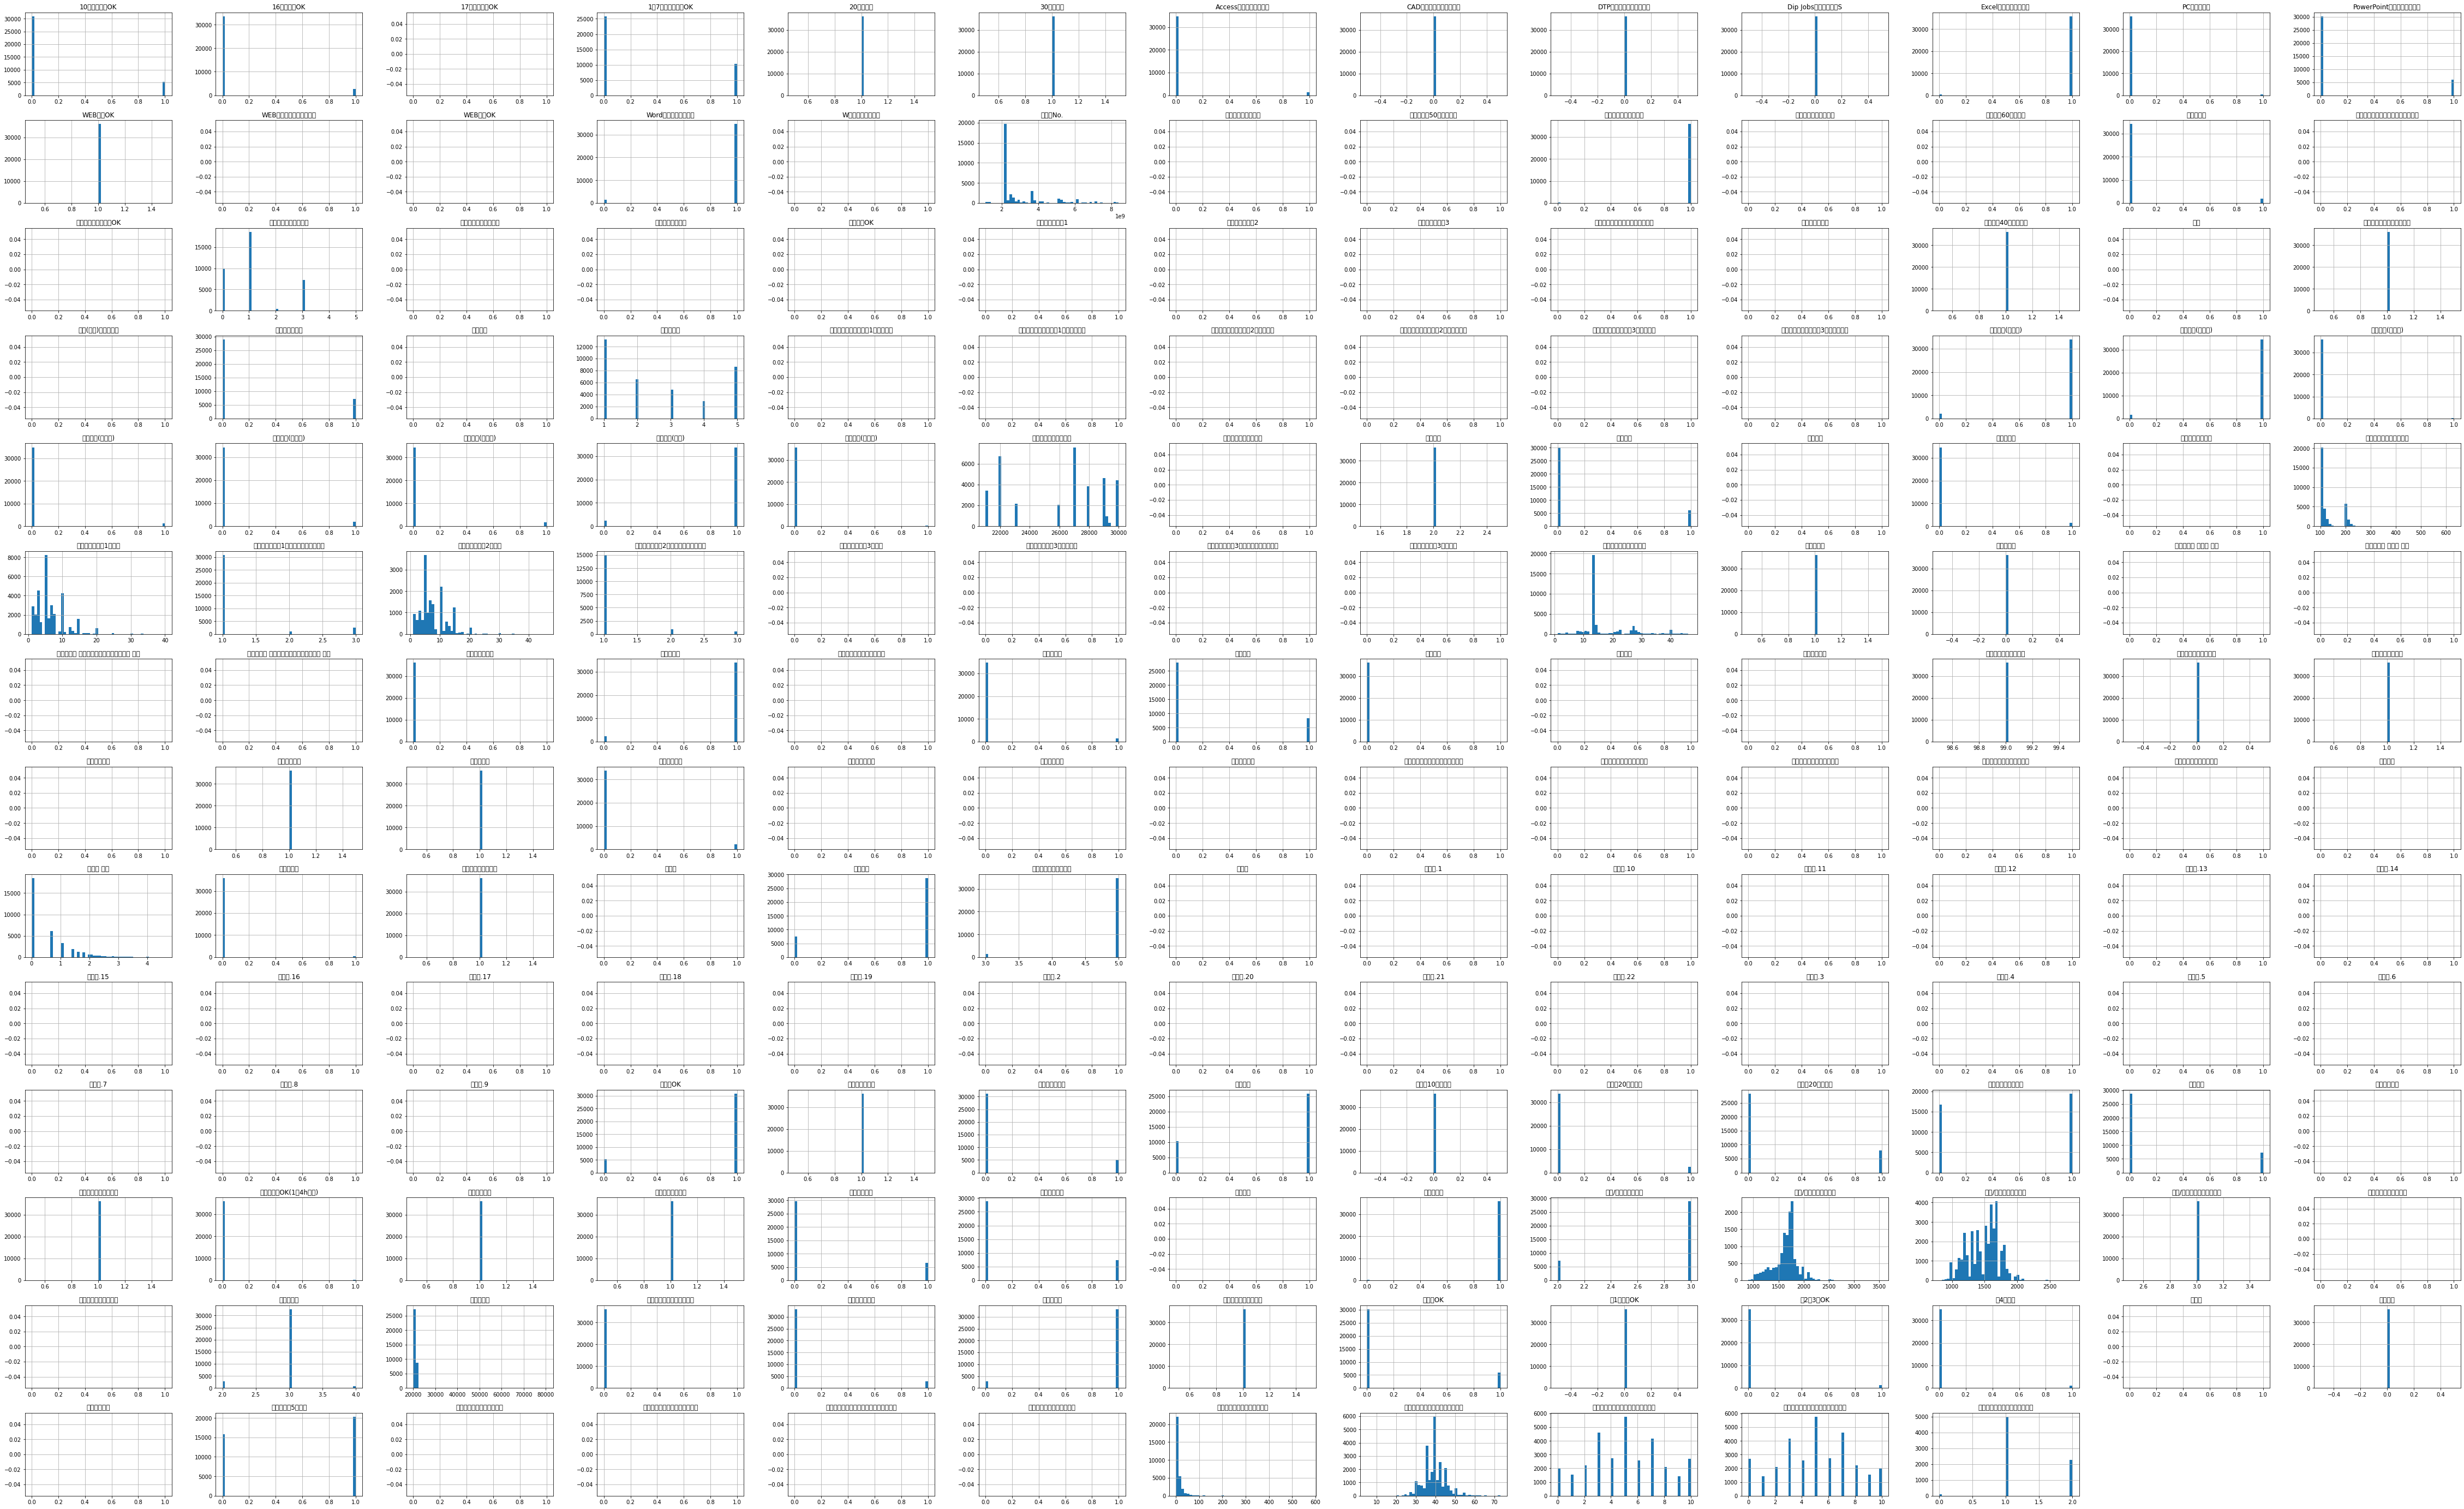

In [37]:

import matplotlib.pyplot as plt 
ketugo.hist(bins=50, figsize=(80,50)) 
plt.show()

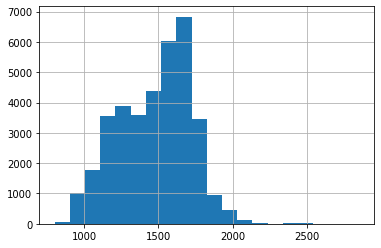

In [38]:
ketugo['給与/交通費　給与下限'].hist(bins=20);

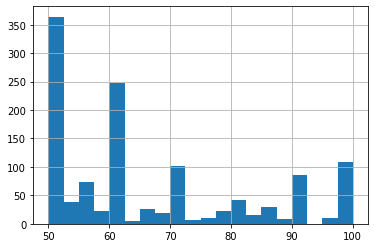

In [39]:
ketugo['（派遣先）配属先部署　人数'].hist(range=(50, 100),bins=20);

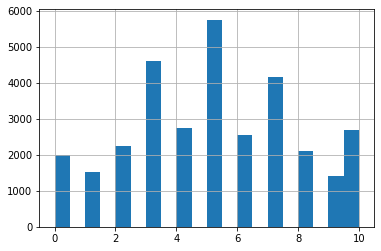

In [40]:

ketugo['（派遣先）配属先部署　男女比　女'].hist(bins=20);

In [41]:
	
#相関係数をプロット
#sns.pairplot(ketugo)

In [42]:
from pandas.tools.plotting import scatter_matrix
attributes = ["給与/交通費　給与下限", "勤務地　最寄駅1（分）","（派遣先）配属先部署　男女比　女"]
scatter_matrix(ketugo[attributes], figsize=(12, 8))

ModuleNotFoundError: ignored

In [ ]:

#相関行列を作成
corr_matrix = ketugo.corr()
print(corr_matrix)

In [ ]:
sns.heatmap(corr_matrix,
            square=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

（派遣先）概要　勤務先名（漢字）           object
学校・公的機関（官公庁）                int64
could not convert string to float 'line'の原因
データ全体の型を見ること

#yの重複について　ほぼゴミ

1.   重複を集約し、平均化

2.   ただし応募数によってxより行数が少なくなる





In [ ]:
# y.isnull().sum()
# y
# print(y[y.duplicated()])
# y
# x.head()

# f=re.match('中央大学',x)

# x=x.astype(float)


# f = re.findall('[0-9]{3}-[0-9]{4}' , x)
# f

# print(f)

In [ ]:
# y=y.groupby("お仕事No.").agg({"応募数 合計":"mean"})　#集約と平均化
# y=y.groupby("お仕事No.")
# y.head()

# y.reset_index(inplace=True)
# y.colums =["お仕事No.","応募数　合計"]
# y


# print(y.duplicated().value_counts())
# y

In [ ]:
#xデータの確認
# x.describe()
# y.describe()

#共通お仕事No以外の削除　

In [ ]:
# A=set(x)&set(y)　　＃ここ検討　共通のお仕事で数揃える
# print(A)
# len(A)

#配列変換

In [ ]:
y = ketugo["応募数 合計"]
x = ketugo.drop(["お仕事No.","応募数 合計"],axis = 1)

In [ ]:
y_array=np.array(y)
x_array=np.array(x)

In [ ]:

print(y_array.shape)
x_array.shape

#アルゴリズム構築

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_array,y_array,test_size = 0.4,random_state =0)

In [ ]:
print(x_train.shape) 
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=0)

In [ ]:
rfr.fit(x_train,y_train)

#結果出力

In [ ]:
y_pred = rfr.predict(x_test)
y_pred.shape

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

#テストコードの確認

In [ ]:
work_assignment = pd.read_csv("test_x.csv",encoding="utf-8")
x2 =work_assignment.drop(["お仕事No."],axis = 1)

#テストデータ削減


In [ ]:
x2=x2.drop(["掲載期間　開始日","掲載期間　終了日","動画コメント","応募資格"
,"派遣会社のうれしい特典","お仕事のポイント（仕事PR）","（派遣先）職場の雰囲気","期間･時間　備考"
,"勤務地　最寄駅2（駅名）","勤務地　最寄駅2（沿線名）","（紹介予定）雇用形態備考","（紹介予定）休日休暇","勤務地　最寄駅1（駅名）","給与/交通費　備考"
,"休日休暇　備考","（派遣）応募後の流れ","期間・時間　勤務時間","（派遣先）概要　事業内容","（紹介予定）年収・給与例","勤務地　最寄駅1（沿線名）"
,"動画タイトル","仕事内容","（派遣先）配属先部署","動画ファイル名","（派遣先）勤務先写真ファイル名","（紹介予定）待遇・福利厚生"
,"勤務地　備考","拠点番号","お仕事名","（紹介予定）入社時期","期間・時間　勤務開始日"
,"（派遣先）概要　勤務先名（漢字）","学校・公的機関（官公庁）"],axis=1)


x2=x2.fillna(0)

# x.head()
# work_assignment.head()

# print(x.dtypes)

# work_assignment.head()

In [ ]:
x2_array = np.array(x2)
x2_array.shape

#テストデータ学習

In [ ]:
y2_pred =rfr.predict(x2_array)
y2_pred.shape

In [ ]:
y2_pred

In [ ]:
pread_fomat = pd.DataFrame({"お仕事No." : work_assignment["お仕事No."],"応募数 合計" : y2_pred})

In [ ]:
pread_fomat

In [ ]:
pread_fomat.to_csv("Ans.csv",index=False)

#テスト

In [ ]:
X_test=pd.read_csv("test_x.csv")#testの説明変数
X_test.isnull()